<a href="https://colab.research.google.com/github/Saikumar1422/excelr-data-science-assignments/blob/main/clustering2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/crime_data.csv")


In [ ]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']


In [ ]:
df.loc[:,'Total'] = df.sum(numeric_only=True, axis=1)


In [ ]:
df.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [ ]:
df.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


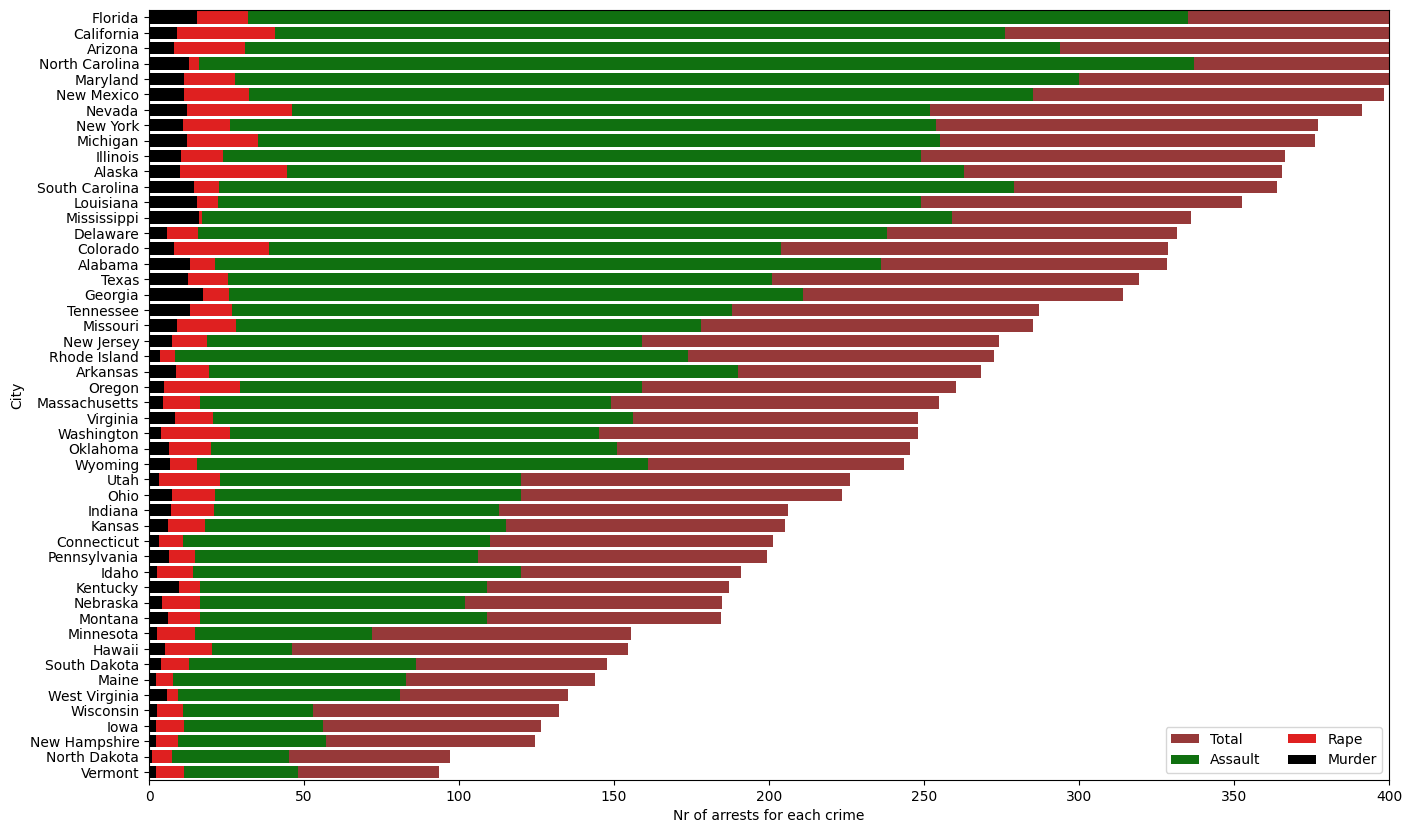

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="brown")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="green")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="red")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="black")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");


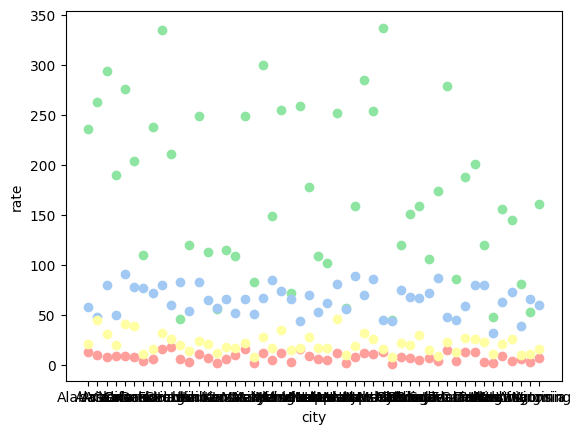

In [ ]:
plt.scatter(df.City, df.Murder, color='r')
plt.scatter(df.City, df.Assault, color='g')
plt.scatter(df.City, df.Urbanpop, color='b')
plt.scatter(df.City, df.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

## **3 - Finding out the optimal number of clusters**

In [ ]:
X = df[['Murder', 'Assault', 'Rape', 'Urbanpop']]


In [ ]:
df_norm = preprocessing.scale(X)


In [ ]:
df_norm = pd.DataFrame(df_norm)

In [ ]:
df_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


In [ ]:
import warnings
warnings.filterwarnings('ignore')

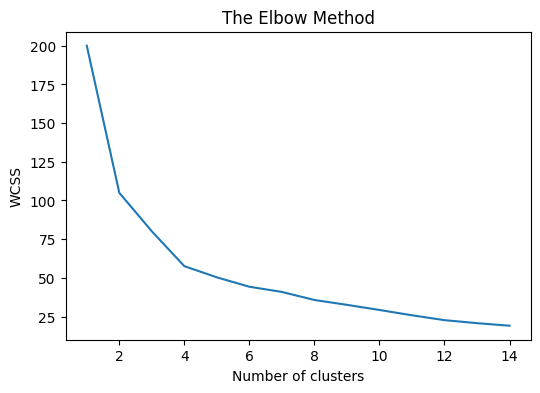

In [ ]:

plt.figure(figsize=(6, 4))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## The plot levels off at k=4 and let's use it to determine the clusters


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

In [ ]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [ ]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [ ]:
df['cluster'] = cluster


In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster


,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


<Axes: xlabel='Murder', ylabel='Assault'>

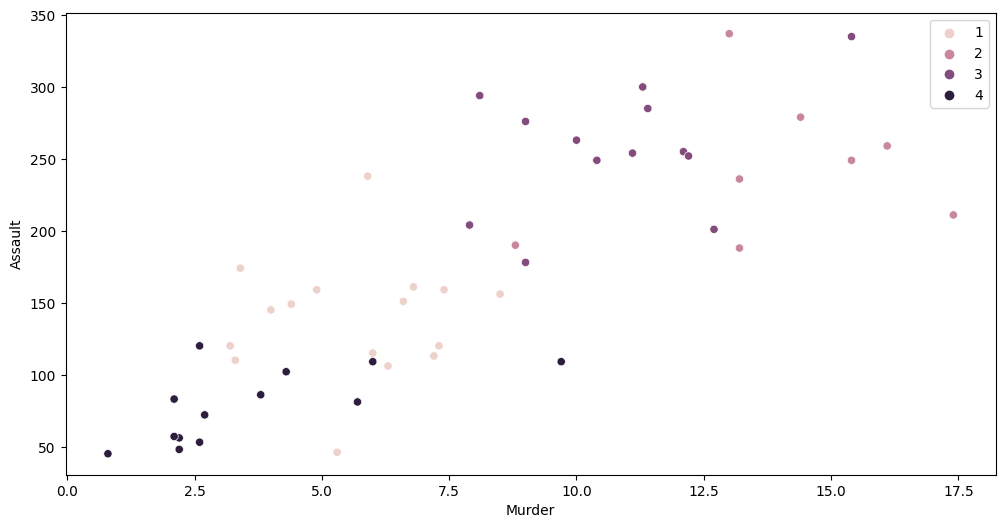

In [ ]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans1)

<Axes: xlabel='Murder', ylabel='Rape'>

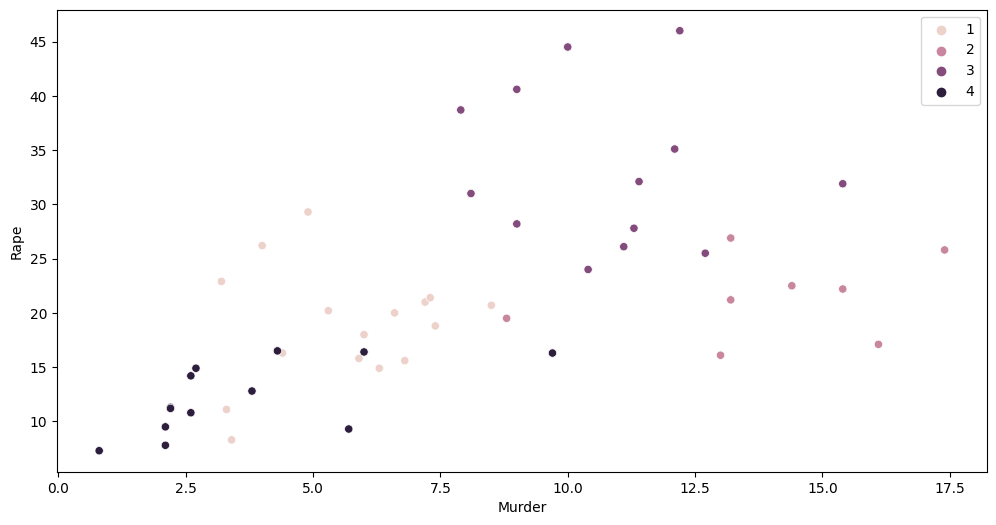

In [ ]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Rape'],hue=y_kmeans1)

<Axes: xlabel='Rape', ylabel='Assault'>

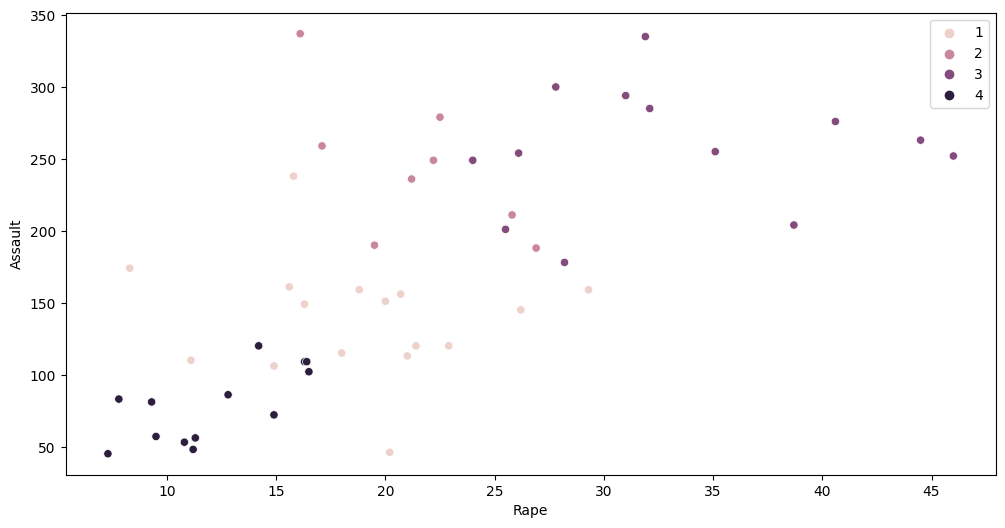

In [ ]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Rape'], y = df['Assault'],hue=y_kmeans1)

In [ ]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)


In [ ]:
df_total.head()


,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


# **Conclusion**

1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - As with murder and assault, also rates of rape and assault show clearer correlations